In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [3]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN


In [4]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
7171,Zimbabwe,1994,2603.927369,NaN
7172,Zimbabwe,1993,2420.092791,NaN
7173,Zimbabwe,1992,2437.152908,NaN
7174,Zimbabwe,1991,2733.696626,NaN
7175,Zimbabwe,1990,2652.129209,NaN


# #5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [5]:
gdp_df.shape

(7176, 4)

In [6]:
gdp_df.columns

Index(['Country or Area', 'Year', 'Value', 'Value Footnotes'], dtype='object')

  ## There are 7176 rows and 4 columns. The columns are all data type object.

# #6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [7]:
#gdp_df2 = gdp_df.columns.drop('Value Footnotes')

In [8]:
gdp_df2 = gdp_df.rename(columns={'Country or Area':'Country', 'Year':'Year', 'Value':'GDP_Per_Capita'})
gdp_df2

,Country,Year,GDP_Per_Capita,Value Footnotes
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN
...,...,...,...,...
7171,Zimbabwe,1994,2603.927369,NaN
7172,Zimbabwe,1993,2420.092791,NaN
7173,Zimbabwe,1992,2437.152908,NaN
7174,Zimbabwe,1991,2733.696626,NaN


In [9]:
gdp_df3 = gdp_df2.drop(columns = 'Value Footnotes')

In [10]:
gdp_df3

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978
...,...,...,...
7171,Zimbabwe,1994,2603.927369
7172,Zimbabwe,1993,2420.092791
7173,Zimbabwe,1992,2437.152908
7174,Zimbabwe,1991,2733.696626


# #7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [11]:
country_count = gdp_df3.Country.value_counts()
country_count

Least developed countries: UN classification    31
Niger                                           31
Middle East & North Africa (IDA & IBRD)         31
Middle income                                   31
Mongolia                                        31
                                                ..
Kosovo                                          13
Turks and Caicos Islands                        10
Sint Maarten (Dutch part)                       10
Somalia                                          8
Djibouti                                         8
Name: Country, Length: 242, dtype: int64

In [12]:
country_count = country_count.to_frame()
country_count

,Country
Least developed countries: UN classification,31
Niger,31
Middle East & North Africa (IDA & IBRD),31
Middle income,31
Mongolia,31
...,...
Kosovo,13
Turks and Caicos Islands,10
Sint Maarten (Dutch part),10
Somalia,8


In [13]:
country_count=country_count.reset_index()
country_count

,index,Country
0,Least developed countries: UN classification,31
1,Niger,31
2,Middle East & North Africa (IDA & IBRD),31
3,Middle income,31
4,Mongolia,31
...,...,...
237,Kosovo,13
238,Turks and Caicos Islands,10
239,Sint Maarten (Dutch part),10
240,Somalia,8


In [14]:
count=len(country_count[country_count['Country']==31])
count

205

## 205 Countries have all 31 years.

In [15]:
242-205

37

In [16]:
country_count.columns=['Country', 'count']
country_count

,Country,count
0,Least developed countries: UN classification,31
1,Niger,31
2,Middle East & North Africa (IDA & IBRD),31
3,Middle income,31
4,Mongolia,31
...,...,...
237,Kosovo,13
238,Turks and Caicos Islands,10
239,Sint Maarten (Dutch part),10
240,Somalia,8


In [17]:
country_count.tail(37)

,Country,count
205,Turkmenistan,30
206,Hungary,30
207,Slovak Republic,29
208,Cambodia,28
209,West Bank and Gaza,27
210,Bosnia and Herzegovina,27
211,Slovenia,26
212,Latvia,26
213,Israel,26
214,Lithuania,26


## Those 37 countries are missing years of data.


In [18]:
year_count = gdp_df3.Year.value_counts()
year_count

2018    242
2017    242
2016    242
2015    242
2014    242
2013    242
2019    241
2020    240
2012    240
2011    240
2010    239
2009    239
2008    238
2007    237
2006    237
2004    236
2005    236
2003    235
2002    235
2001    234
2000    233
1999    227
1998    226
1997    226
1996    222
1995    222
1994    211
1993    209
1992    208
1991    207
1990    206
Name: Year, dtype: int64

## The observations per year steadily increase from 1990-2020


# 8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [19]:
gdp_2020 = gdp_df3.loc[gdp_df3.Year == 2020]
gdp_2020

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
19,Africa Eastern and Southern,2020,3491.978104
50,Africa Western and Central,2020,4021.293919
81,Albania,2020,13253.733337
112,Algeria,2020,10735.382539
...,...,...,...
7025,Vietnam,2020,10338.270543
7056,West Bank and Gaza,2020,5402.538773
7083,World,2020,16269.969854
7114,Zambia,2020,3277.816510


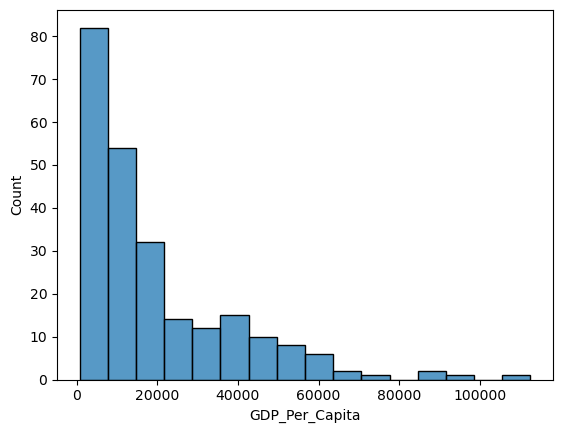

In [20]:
sns.histplot(data=gdp_2020, x="GDP_Per_Capita")
plt.show()

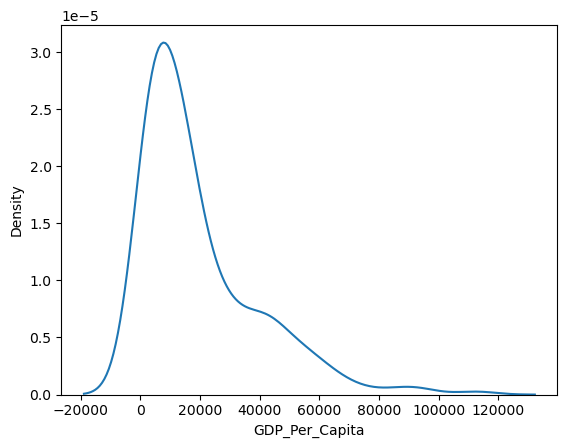

In [21]:
sns.kdeplot(gdp_2020['GDP_Per_Capita'])
plt.show()

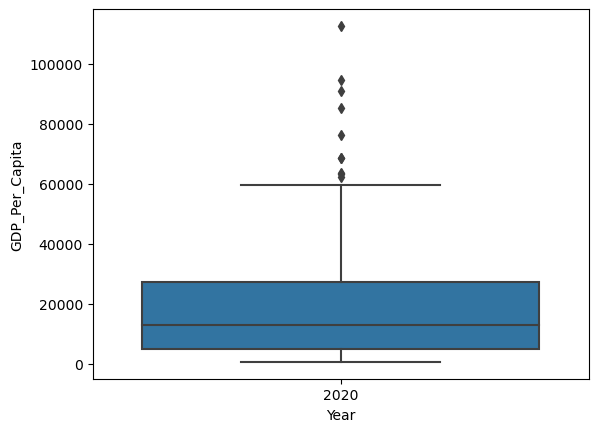

In [22]:
sns.boxplot( x=gdp_2020["Year"], y=gdp_2020["GDP_Per_Capita"] )
plt.show()

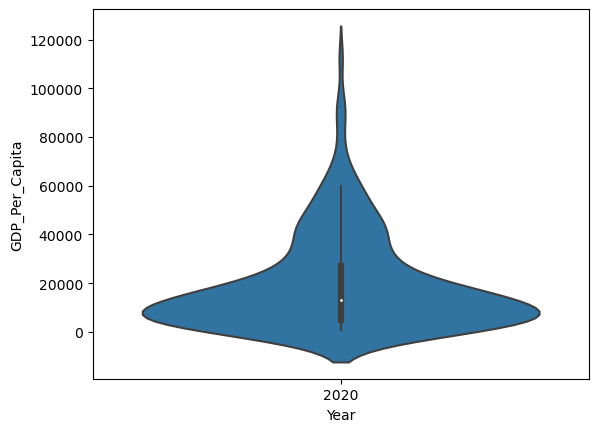

In [23]:
sns.violinplot(x=gdp_2020["Year"], y=gdp_2020["GDP_Per_Capita"])
plt.show()

## I notice that in the year 2020 the highest gdp per capita is between 0 and 20000.

## The boxplot allows to quickly get the median, quartiles and outliers but also hides the dataset individual data points. The violin chart shows a little more detail than the box plot. The density and histrogram charts show the individual data points.


# 9. What was the median GDP per capita value in 2020?

In [24]:
gdp_2020.median()

C:\Users\neyan\AppData\Local\Temp\ipykernel_12696\3149249091.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  gdp_2020.median()


Year               2020.000000
GDP_Per_Capita    12908.937406
dtype: float64

## 12908.937406 is the median GDP per capital value in 2020

# 10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [25]:
gdp_2010 = gdp_df3.loc[gdp_df3.Year == 2010]
gdp_2010

,Country,Year,GDP_Per_Capita
10,Afghanistan,2010,1957.029070
29,Africa Eastern and Southern,2010,3545.205203
60,Africa Western and Central,2010,3794.179490
91,Albania,2010,10749.481671
122,Algeria,2010,10970.692420
...,...,...,...
7035,Vietnam,2010,6285.144918
7066,West Bank and Gaza,2010,5411.066482
7093,World,2010,13964.866191
7124,Zambia,2010,3125.528849


In [26]:
gdp_2000 = gdp_df3.loc[gdp_df3.Year == 2000]
gdp_2000

,Country,Year,GDP_Per_Capita
39,Africa Eastern and Southern,2000,2915.472987
70,Africa Western and Central,2000,2690.555839
101,Albania,2000,5892.590548
132,Algeria,2000,8710.444074
163,Angola,2000,4707.954625
...,...,...,...
7045,Vietnam,2000,3649.242659
7076,West Bank and Gaza,2000,4503.248860
7103,World,2000,11140.090244
7134,Zambia,2000,1990.858991


In [27]:
gdp_1990 = gdp_df3.loc[gdp_df3.Year == 1990]
gdp_1990

,Country,Year,GDP_Per_Capita
49,Africa Eastern and Southern,1990,3083.976800
80,Africa Western and Central,1990,2810.341129
111,Albania,1990,4827.034551
142,Algeria,1990,8746.340762
173,Angola,1990,5758.950488
...,...,...,...
7024,Vanuatu,1990,2855.554643
7055,Vietnam,1990,2066.372215
7113,World,1990,9704.621768
7144,Zambia,1990,2190.181724


In [28]:
gdp_decades = pd.concat([gdp_1990, gdp_2000, gdp_2010, gdp_2020])
gdp_decades


,Country,Year,GDP_Per_Capita
49,Africa Eastern and Southern,1990,3083.976800
80,Africa Western and Central,1990,2810.341129
111,Albania,1990,4827.034551
142,Algeria,1990,8746.340762
173,Angola,1990,5758.950488
...,...,...,...
7025,Vietnam,2020,10338.270543
7056,West Bank and Gaza,2020,5402.538773
7083,World,2020,16269.969854
7114,Zambia,2020,3277.816510


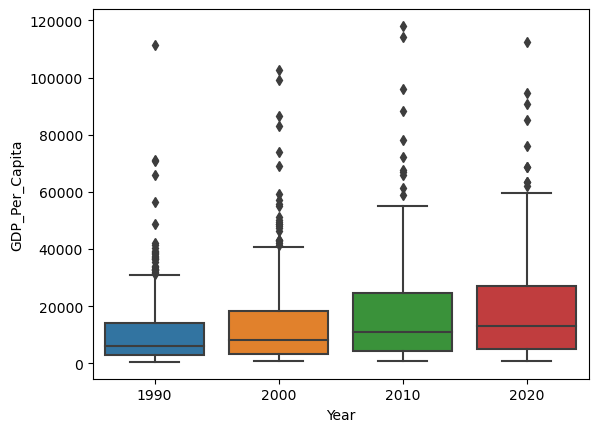

In [29]:
sns.boxplot( x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"] )
plt.show()

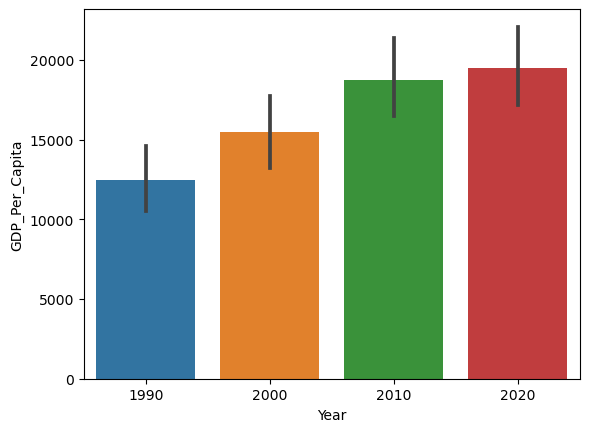

In [30]:
sns.barplot( x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"] )
plt.show()


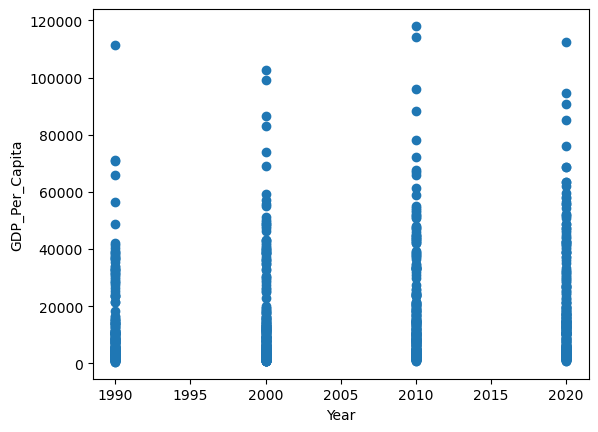

In [31]:
plt.scatter(x = 'Year', y ='GDP_Per_Capita', data = gdp_decades)
plt.xlabel('Year')
plt.ylabel('GDP_Per_Capita');

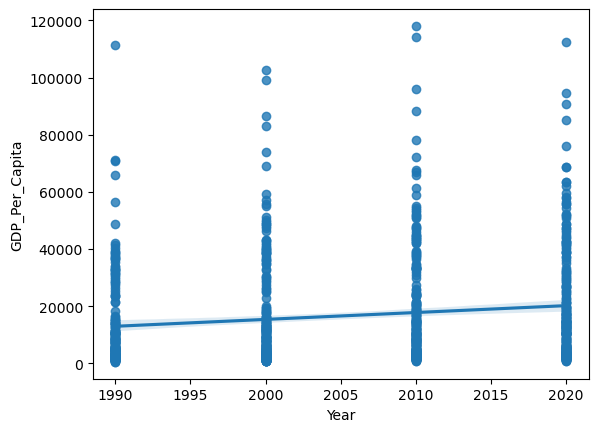

In [32]:
sns.regplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"])
plt.show()

## I see that the GDP values have steadily increased over time. Visually, the bar plot is the easiest to read quickly seconded by the box plot. The scatter plot is not that helpful without the trend line. 

# 11. Which country was the first to have a GDP per capita greater than $100,000?

In [33]:
gdp_df3

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978
...,...,...,...
7171,Zimbabwe,1994,2603.927369
7172,Zimbabwe,1993,2420.092791
7173,Zimbabwe,1992,2437.152908
7174,Zimbabwe,1991,2733.696626


In [34]:
gdp_100000 = gdp_df3.loc[gdp_df3.GDP_Per_Capita >100000]
gdp_100000

,Country,Year,GDP_Per_Capita
3882,Luxembourg,2020,112557.309472
3883,Luxembourg,2019,116518.276815
3884,Luxembourg,2018,115049.926079
3885,Luxembourg,2017,114985.842236
3886,Luxembourg,2016,116283.699681
3887,Luxembourg,2015,113182.728563
3888,Luxembourg,2014,113313.578898
3889,Luxembourg,2013,113050.663254
3890,Luxembourg,2012,112137.135491
3891,Luxembourg,2011,112998.390477


## United Arab Emirates is the first to have a GDP per capita over $100,000.

# 12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.


In [35]:
gdp_2020_dsc = gdp_2020.sort_values(['GDP_Per_Capita'], ascending=False)
gdp_2020_dsc

,Country,Year,GDP_Per_Capita
3882,Luxembourg,2020,112557.309472
5720,Singapore,2020,94505.636160
3071,Ireland,2020,90789.221024
5381,Qatar,2020,85290.450430
639,Bermuda,2020,76105.138057
...,...,...,...
4750,Niger,2020,1221.269930
5871,Somalia,2020,1180.965971
1524,Dem. Rep. Congo,2020,1082.445242
1136,Central African Republic,2020,937.856470


## Luxembourg has the highest gdp per capita in 2020

In [36]:
gdp_lux = gdp_df3.loc[gdp_df3.Country=='Luxembourg']
gdp_lux

,Country,Year,GDP_Per_Capita
3882,Luxembourg,2020,112557.309472
3883,Luxembourg,2019,116518.276815
3884,Luxembourg,2018,115049.926079
3885,Luxembourg,2017,114985.842236
3886,Luxembourg,2016,116283.699681
3887,Luxembourg,2015,113182.728563
3888,Luxembourg,2014,113313.578898
3889,Luxembourg,2013,113050.663254
3890,Luxembourg,2012,112137.135491
3891,Luxembourg,2011,112998.390477


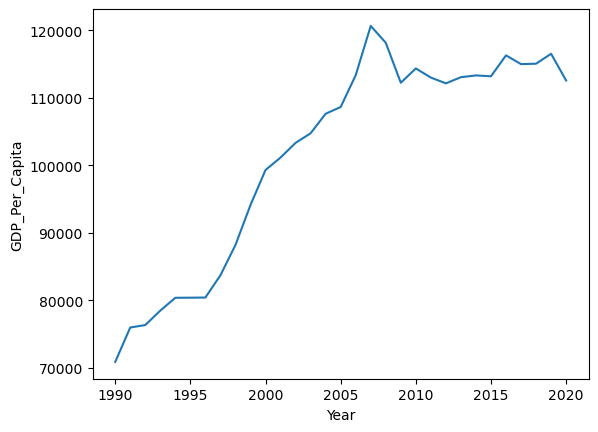

In [37]:
x_axis = gdp_lux['Year']
y_axis = gdp_lux['GDP_Per_Capita']

plt.plot(x_axis, y_axis)
plt.xlabel('Year')
plt.ylabel('GDP_Per_Capita')
plt.show()

# 13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [38]:
gdp_2020_asc = gdp_2020.sort_values(['GDP_Per_Capita'], ascending=True)
gdp_2020_asc

,Country,Year,GDP_Per_Capita
914,Burundi,2020,731.064074
1136,Central African Republic,2020,937.856470
1524,Dem. Rep. Congo,2020,1082.445242
5871,Somalia,2020,1180.965971
4750,Niger,2020,1221.269930
...,...,...,...
639,Bermuda,2020,76105.138057
5381,Qatar,2020,85290.450430
3071,Ireland,2020,90789.221024
5720,Singapore,2020,94505.636160


## Burundi had the lowest gdp per capita in 2020

In [39]:
gdp_bur = gdp_df3.loc[gdp_df3.Country=='Burundi']
gdp_bur.head()

,Country,Year,GDP_Per_Capita
914,Burundi,2020,731.064074
915,Burundi,2019,751.443405
916,Burundi,2018,761.524143
917,Burundi,2017,773.572859
918,Burundi,2016,794.604340


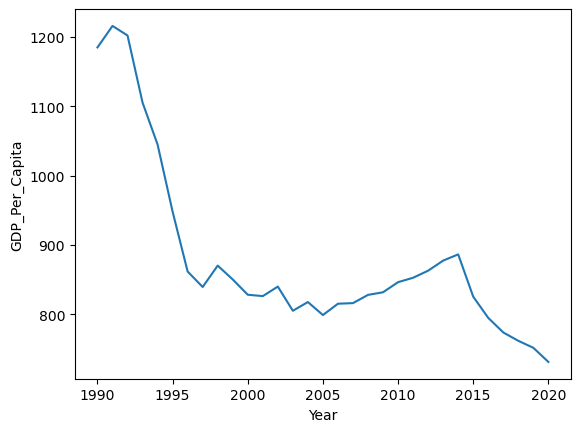

In [40]:
x_axis = gdp_bur['Year']
y_axis = gdp_bur['GDP_Per_Capita']

plt.plot(x_axis, y_axis)
plt.xlabel('Year')
plt.ylabel('GDP_Per_Capita')
plt.show()

## Bonus question: Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?¶

In [88]:
gdp_9020 = pd.concat([gdp_1990, gdp_2020])
gdp_9020

,Country,Year,GDP_Per_Capita
49,Africa Eastern and Southern,1990,3083.976800
80,Africa Western and Central,1990,2810.341129
111,Albania,1990,4827.034551
142,Algeria,1990,8746.340762
173,Angola,1990,5758.950488
...,...,...,...
7025,Vietnam,2020,10338.270543
7056,West Bank and Gaza,2020,5402.538773
7083,World,2020,16269.969854
7114,Zambia,2020,3277.816510


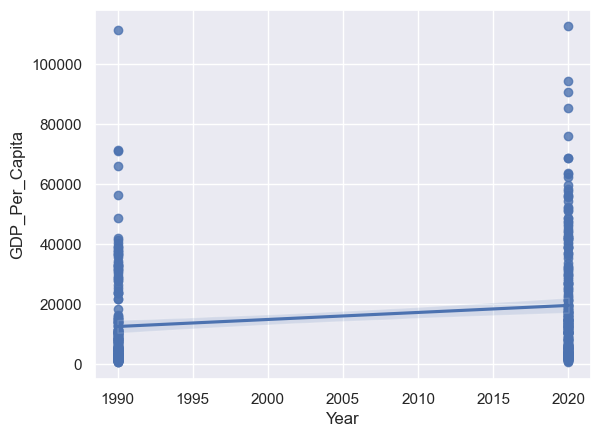

In [89]:
sns.regplot(x=gdp_9020["Year"], y=gdp_9020["GDP_Per_Capita"])
plt.show()

In [91]:
gdp_1990_dsc = gdp_1990.sort_values(['GDP_Per_Capita'], ascending=False)
gdp_1990_dsc

,Country,Year,GDP_Per_Capita
6838,United Arab Emirates,1990,111454.055665
851,Brunei,1990,71232.789430
3912,Luxembourg,1990,70860.819124
669,Bermuda,1990,65961.406278
6343,Switzerland,1990,56329.215654
...,...,...,...
5494,Rwanda,1990,936.634310
6776,Uganda,1990,913.726756
1991,Ethiopia,1990,767.013565
4577,Myanmar,1990,564.227113


In [93]:
gdp_uae = gdp_df3.loc[gdp_df3.Country=='United Arab Emirates']
gdp_uae

,Country,Year,GDP_Per_Capita
6808,United Arab Emirates,2020,63299.422971
6809,United Arab Emirates,2019,68263.675535
6810,United Arab Emirates,2018,66968.221181
6811,United Arab Emirates,2017,67183.605312
6812,United Arab Emirates,2016,66510.893666
6813,United Arab Emirates,2015,65267.415127
6814,United Arab Emirates,2014,62452.184508
6815,United Arab Emirates,2013,59920.152313
6816,United Arab Emirates,2012,57389.318786
6817,United Arab Emirates,2011,56122.576682


In [94]:
gdp_uae_dsc = gdp_uae.sort_values(['GDP_Per_Capita'], ascending=False)
gdp_uae_dsc

,Country,Year,GDP_Per_Capita
6838,United Arab Emirates,1990,111454.055665
6837,United Arab Emirates,1991,106103.552655
6831,United Arab Emirates,1997,105108.996265
6836,United Arab Emirates,1992,103470.924576
6828,United Arab Emirates,2000,102494.714624
6832,United Arab Emirates,1996,102211.638844
6833,United Arab Emirates,1995,101570.992100
6834,United Arab Emirates,1994,100213.156226
6830,United Arab Emirates,1998,100100.435658
6835,United Arab Emirates,1993,98978.474614


In [98]:
gdp_9020_3=gdp_9020.sort_values(['GDP_Per_Capita'], ascending=False)
gdp_9020_3

,Country,Year,GDP_Per_Capita
3882,Luxembourg,2020,112557.309472
6838,United Arab Emirates,1990,111454.055665
5720,Singapore,2020,94505.636160
3071,Ireland,2020,90789.221024
5381,Qatar,2020,85290.450430
...,...,...,...
6776,Uganda,1990,913.726756
1991,Ethiopia,1990,767.013565
914,Burundi,2020,731.064074
4577,Myanmar,1990,564.227113


In [99]:
gdp_bur2 = gdp_df3.loc[gdp_df3.Country=='Burundi']
gdp_bur2

,Country,Year,GDP_Per_Capita
914,Burundi,2020,731.064074
915,Burundi,2019,751.443405
916,Burundi,2018,761.524143
917,Burundi,2017,773.572859
918,Burundi,2016,794.604340
919,Burundi,2015,825.205574
920,Burundi,2014,886.235296
921,Burundi,2013,877.272857
922,Burundi,2012,862.715651
923,Burundi,2011,852.502576


## In general coutries had a higher GDP per capita in 2020 than in 1990, but United Arab Emirates and Burundi had a lower GDP per capita in 2020 than it did in 1990.

In [117]:
#gdp_9020_2 = gdp_9020.loc[gdp_9020.GDP_Per_Capita(gdp_9020.Year==1990)>gdp_9020.GDP_Per_Capita(gdp_9020.Year==2020)]
#gdp_9020_2
#gdp_9020_2['new'] = np.where((gdp_9020['GDP_Per_Capita'] > gdp_9020['GDP_Per_Capita']) & (
    #gdp_9020['Year'] ==1990 or gdp_9020['Year']==2020), 'yes', 'no')
#gdp_9020_2=gdp_9020.loc[((gdp_9020['Year']=='1990').GDP_Per_Capita)>((gdp_9020['Year']=='2020').GDP_Per_Capita)]
#gdp_9020_2   

# 14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [41]:
internet_df = pd.read_csv('../data/internet_use.csv',nrows=4495)

In [42]:
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN


In [43]:
internet_df.tail()

,Country or Area,Year,Value,Value Footnotes
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


In [44]:
internet_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

# 15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [45]:
internet_df = internet_df.rename(columns={'Country or Area':'Country', 'Year':'Year', 'Value':'Internet_Users_Pct'})
internet_df.head()

,Country,Year,Internet_Users_Pct,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN


In [46]:
internet_df = internet_df.drop(columns = 'Value Footnotes')
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


# 16. Look at the number of observations in this dataset per year. What do you notice?

In [47]:
year_count_int = internet_df.Year.value_counts()
year_count_int

1990    210
2011    207
2007    206
2008    204
2012    203
2010    203
2009    203
2014    202
2013    202
2002    202
2005    201
2001    201
2006    200
2000    199
2004    199
1999    198
2003    196
1998    190
1997    184
1996    175
1995    138
1994     91
1993     65
1992     50
1991     39
1989      8
1980      7
1965      7
1970      7
1975      7
1976      7
1977      7
1978      7
1979      7
1982      7
1981      7
1983      7
1984      7
1985      7
1986      7
1987      7
1988      7
1960      7
Name: Year, dtype: int64

## 1990 has the highest count, but the rest of the 90s were fairly low. Anything  before 1990 is single digit. 

# 17. What is the first year to have a non-zero internet users percentage value?

In [48]:
internet_df_asc = internet_df.sort_values(['Internet_Users_Pct'], ascending=True)
internet_df_asc

,Country,Year,Internet_Users_Pct
4494,Zimbabwe,1990,0.0000
3897,Syria,1992,0.0000
3898,Syria,1991,0.0000
3899,Syria,1990,0.0000
1363,Fiji,1990,0.0000
...,...,...,...
1868,Iceland,2012,96.2098
3016,Norway,2014,96.3000
1867,Iceland,2013,96.5468
415,Bermuda,2014,96.8000


In [49]:
internet_df_notzero = internet_df_asc[internet_df_asc['Internet_Users_Pct']>0]
internet_df_notzero.head()

,Country,Year,Internet_Users_Pct
1318,Ethiopia,1995,0.000018
3999,Thailand,1991,0.000052
1016,Cuba,1995,0.000092
927,Congo (Democratic Republic of the),1996,0.000108
1913,India,1992,0.000111


## 1995 is the first year to have non-zero internet users

# 18. How does the distribution of internet users percent differ for 2000 and 2014?

In [50]:
internet_df.describe

<bound method NDFrame.describe of           Country  Year  Internet_Users_Pct
0     Afghanistan  2014            6.390000
1     Afghanistan  2013            5.900000
2     Afghanistan  2012            5.454545
3     Afghanistan  2011            5.000000
4     Afghanistan  2010            4.000000
...           ...   ...                 ...
4490     Zimbabwe  1997            0.033080
4491     Zimbabwe  1996            0.016790
4492     Zimbabwe  1995            0.007684
4493     Zimbabwe  1994            0.001739
4494     Zimbabwe  1990            0.000000

[4495 rows x 3 columns]>

In [51]:
internet_df2000 = internet_df.loc[internet_df.Year==2000]
internet_df2000

,Country,Year,Internet_Users_Pct
29,Albania,2000,0.114097
50,Algeria,2000,0.491706
72,Andorra,2000,10.538836
92,Angola,2000,0.105046
112,Antigua and Barbuda,2000,6.482226
...,...,...,...
4403,Viet Nam,2000,0.254248
4423,Virgin Islands (U.S.),2000,13.815081
4445,Yemen,2000,0.082500
4465,Zambia,2000,0.191072


In [52]:
internet_df2014 = internet_df.loc[internet_df.Year==2014]
internet_df2014

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.39
15,Albania,2014,60.10
36,Algeria,2014,18.09
59,Andorra,2014,95.90
78,Angola,2014,21.26
...,...,...,...
4389,Viet Nam,2014,48.31
4409,Virgin Islands (U.S.),2014,50.07
4431,Yemen,2014,22.55
4451,Zambia,2014,17.34


In [53]:
internet_df2000_2014 = pd.concat([internet_df2000, internet_df2014])
internet_df2000_2014

,Country,Year,Internet_Users_Pct
29,Albania,2000,0.114097
50,Algeria,2000,0.491706
72,Andorra,2000,10.538836
92,Angola,2000,0.105046
112,Antigua and Barbuda,2000,6.482226
...,...,...,...
4389,Viet Nam,2014,48.310000
4409,Virgin Islands (U.S.),2014,50.070000
4431,Yemen,2014,22.550000
4451,Zambia,2014,17.340000


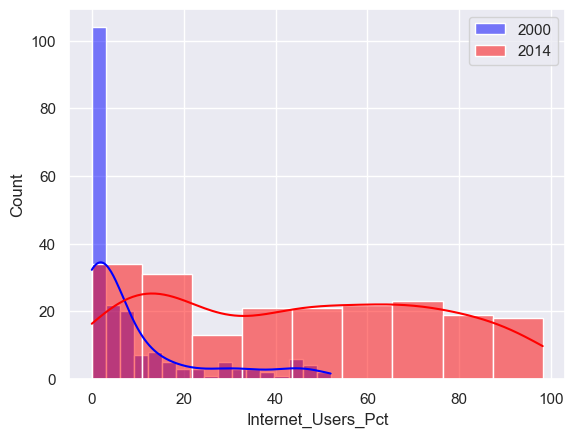

In [54]:
sns.set(style="darkgrid")
df = sns.load_dataset("iris")

sns.histplot(data=internet_df2000, x="Internet_Users_Pct", color="blue", label="2000", kde=True)
sns.histplot(data=internet_df2014, x="Internet_Users_Pct", color="red", label="2014", kde=True)

plt.legend() 
plt.show()


## It looks like 2000 had a big spike initially and then never made it past 50% where as 2014 stayed consistent from 0 to 100%

# 19. For how many countries was the percentage of internet users below 5% in 2014?

In [55]:
internet_df2014_5 = internet_df2014.loc[internet_df2014['Internet_Users_Pct']<5]
internet_df2014_5

,Country,Year,Internet_Users_Pct
623,Burundi,2014,1.38
762,Central African Rep.,2014,4.03
782,Chad,2014,2.50
909,Congo (Democratic Republic of the),2014,3.00
1065,Dem. People's Rep. of Korea,2014,0.00
1256,Eritrea,2014,0.99
1299,Ethiopia,2014,2.90
1720,Guinea,2014,1.72
1742,Guinea-Bissau,2014,3.32
2453,Madagascar,2014,3.70


In [56]:
internet_df2014_5.shape

(16, 3)

## 16 countries were below 5% in 2014

# 20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [57]:
gdp_df3.shape

(7176, 3)

In [58]:
internet_df.shape

(4495, 3)

In [59]:
gdp_df3.dtypes

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object

In [60]:
internet_df.dtypes

Country                object
Year                    int64
Internet_Users_Pct    float64
dtype: object

In [61]:
gdp_df3['Year']= gdp_df3['Year'].astype(int)

In [62]:
gdp_df3.dtypes

Country            object
Year                int32
GDP_Per_Capita    float64
dtype: object

In [63]:
gdp_and_internet_use = pd.merge(gdp_df3, internet_df, 
                               left_on = ['Year','Country'], right_on = ['Year','Country'], 
                               how = 'outer')
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN
...,...,...,...,...
8251,Yemen,1999,NaN,0.056629
8252,Yemen,1998,NaN,0.023323
8253,Yemen,1997,NaN,0.015025
8254,Yemen,1996,NaN,0.000621


# 21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [64]:
internet_df2014_asc = internet_df2014.sort_values(['Internet_Users_Pct'], ascending=False)
internet_df2014_asc

,Country,Year,Internet_Users_Pct
1866,Iceland,2014,98.16
415,Bermuda,2014,96.80
3016,Norway,2014,96.30
1083,Denmark,2014,95.99
59,Andorra,2014,95.90
...,...,...,...
3648,Somalia,2014,1.63
623,Burundi,2014,1.38
4019,Timor-Leste,2014,1.14
1256,Eritrea,2014,0.99


## Iceland, Bermuda, and Norway

In [65]:
gdp_df3.dtypes

Country            object
Year                int32
GDP_Per_Capita    float64
dtype: object

In [66]:
gdp_top3 = gdp_df3[gdp_df3["Country"].isin(['Norway','Iceland','Bermuda'])]
gdp_top3

,Country,Year,GDP_Per_Capita
639,Bermuda,2020,76105.138057
640,Bermuda,2019,81681.726668
641,Bermuda,2018,81423.408453
642,Bermuda,2017,81834.955874
643,Bermuda,2016,78149.352535
...,...,...,...
4900,Norway,1994,47541.766710
4901,Norway,1993,45512.390217
4902,Norway,1992,44517.435716
4903,Norway,1991,43229.916320


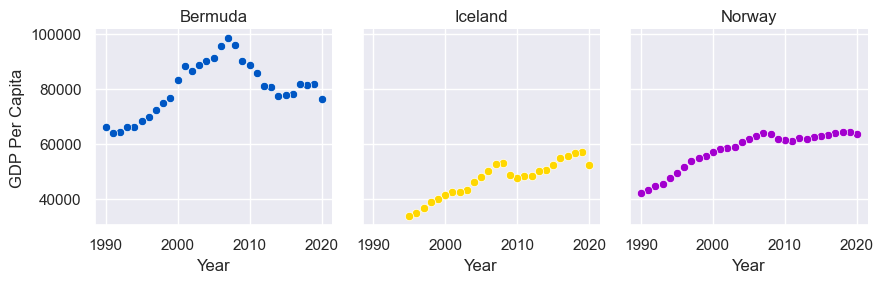

In [67]:
top3_graph = sns.FacetGrid(gdp_top3, col='Country', hue='Country', palette='prism')
top3_graph.map_dataframe(sns.scatterplot, x="Year",  y="GDP_Per_Capita")
top3_graph.set_axis_labels('Year', 'GDP Per Capita')
top3_graph.set_titles(col_template='{col_name}')

## Bermuda has the highest gdp per capita by far. All 3 seemed to peak and then drop off around 2009. 

# 22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

In [76]:
gdp_and_internet_use_2014 = gdp_and_internet_use.loc[gdp_and_internet_use.Year==2014]
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6,Afghanistan,2014,2102.384604,6.39
25,Africa Eastern and Southern,2014,3677.319414,NaN
56,Africa Western and Central,2014,4215.646000,NaN
87,Albania,2014,11586.833878,60.10
118,Algeria,2014,11512.690472,18.09
...,...,...,...,...
8147,Turkey,2014,NaN,51.04
8170,Venezuela,2014,NaN,57.00
8194,Viet Nam,2014,NaN,48.31
8214,Virgin Islands (U.S.),2014,NaN,50.07


# 23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

In [77]:
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6,Afghanistan,2014,2102.384604,6.39
25,Africa Eastern and Southern,2014,3677.319414,NaN
56,Africa Western and Central,2014,4215.646000,NaN
87,Albania,2014,11586.833878,60.10
118,Algeria,2014,11512.690472,18.09
...,...,...,...,...
8147,Turkey,2014,NaN,51.04
8170,Venezuela,2014,NaN,57.00
8194,Viet Nam,2014,NaN,48.31
8214,Virgin Islands (U.S.),2014,NaN,50.07


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


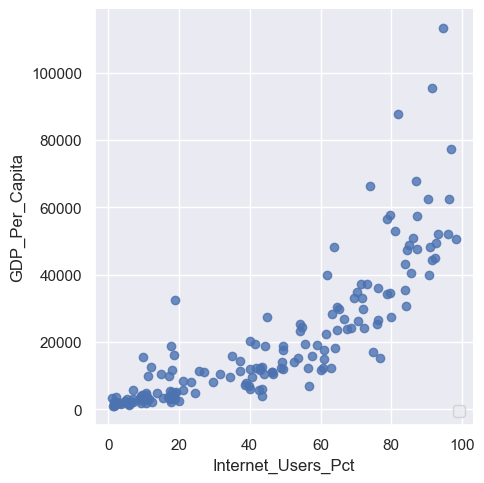

In [80]:
 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="Internet_Users_Pct", y="GDP_Per_Capita", data=gdp_and_internet_use_2014, fit_reg=False, legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

plt.show()

### As the internet users go up so does the GDP per capita

# 24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

In [102]:
gdp_and_internet_use_2014['GDP_group'] = pd.qcut(gdp_and_internet_use_2014['GDP_Per_Capita'], 3, labels=["low", "medium", "high"])
gdp_and_internet_use_2014

C:\Users\neyan\AppData\Local\Temp\ipykernel_12696\3168424030.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_internet_use_2014['GDP_group'] = pd.qcut(gdp_and_internet_use_2014['GDP_Per_Capita'], 3, labels=["low", "medium", "high"])


,Country,Year,GDP_Per_Capita,Internet_Users_Pct,GDP_group
6,Afghanistan,2014,2102.384604,6.39,low
25,Africa Eastern and Southern,2014,3677.319414,NaN,low
56,Africa Western and Central,2014,4215.646000,NaN,low
87,Albania,2014,11586.833878,60.10,medium
118,Algeria,2014,11512.690472,18.09,medium
...,...,...,...,...,...
8147,Turkey,2014,NaN,51.04,NaN
8170,Venezuela,2014,NaN,57.00,NaN
8194,Viet Nam,2014,NaN,48.31,NaN
8214,Virgin Islands (U.S.),2014,NaN,50.07,NaN


# 25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?

In [107]:
gdp_and_internet_use_2014.Internet_Users_Pct.median()

44.655

In [108]:
gdp_low=gdp_and_internet_use_2014.loc[(gdp_and_internet_use_2014['GDP_group']=='low')].Internet_Users_Pct.median()
gdp_low

10.6

In [109]:
gdp_medium=gdp_and_internet_use_2014.loc[(gdp_and_internet_use_2014['GDP_group']=='medium')].Internet_Users_Pct.median()
gdp_medium

43.0

In [110]:
gdp_high=gdp_and_internet_use_2014.loc[(gdp_and_internet_use_2014['GDP_group']=='high')].Internet_Users_Pct.median()
gdp_high

78.74000000000001